# Example: Band-Limited White Gaussian Noise Process

Assume that the autocorrelation of a zero-mean, real Gaussian process $ \mathbf{x}(t) $ is given by

$$ R_{\mathbf{x}}(\tau) = 2BN_0 \frac{\sin \pi B \tau}{\pi B \tau} $$

Let $ \mathbf{v}(t) = \mathbf{x}^2(t) $.

The autocorrelation and power spectral density of the process $ \mathbf{v}(t) = \mathbf{x}^2(t) $ are determined in this example. 

The autocorrelation function of $ \mathbf{v}(t) $ is given by

$$ R_{\mathbf{v}}(\tau) = E \{ \mathbf{v}(t)\mathbf{v}(t + \tau) \} = E \{ \mathbf{x}^2(t)\mathbf{x}^2(t + \tau) \} $$

$$ = R^2_{\mathbf{x}}(0) + 2R^2_{\mathbf{x}}(\tau) = 4N_0^2B^2 \left[ 1 + 2 \left( \frac{\sin \pi B \tau}{\pi B \tau} \right)^2 \right]  $$

The corresponding power spectral density is

$$ S_{\mathbf{v}}(f) = \int_{-\infty}^{\infty} R_{\mathbf{v}}(\tau) e^{-j2\pi f \tau} d\tau = (2N_0 B)^2 \delta(f) + 2C(f) $$

where 

$$ C(f) = \int_{-\infty}^{\infty} S_{\mathbf{x}}(\nu) S_{\mathbf{x}}(f - \nu) d\nu  $$

and 

$$ S_{\mathbf{x}}(f) = \begin{cases} 
2N_0, & |f| < \frac{B}{2} \\
0, & \text{otherwise}
\end{cases}  $$

## Process $\mathbf{x}(t)$

We will start by interpreting the provided autocorrelation function and the power spectral density.

### Autocorrelation Function
The autocorrelation function $ R_{\mathbf{x}}(\tau) $ is given by:

$$
R_{\mathbf{x}}(\tau) = 2BN_0 \frac{\sin(\pi B \tau)}{\pi B \tau}
$$

This function is commonly known as the sinc function, which is a characteristic of a band-limited process.

### Power Spectral Density (PSD)
The power spectral density $ S_{\mathbf{x}}(f) $ is provided as:

$$
S_{\mathbf{x}}(f) = \begin{cases} 
2N_0, & |f| < \frac{B}{2} \\
0, & \text{otherwise}
\end{cases}
$$

This PSD indicates that the process $ x(t) $ is band-limited to $ B/2 $ Hz, and it has a flat spectrum within this band.

### Interpreting the Process $ \mathbf{x}(t) $
Given that $ \mathbf{x}(t) $ is a zero-mean, real Gaussian process with the specified autocorrelation and PSD, we can conclude that $ \mathbf{x}(t) $ is a band-limited white Gaussian noise process. The sinc autocorrelation function suggests a band-limited process, and the flat PSD indicates that within the band $ |f| < B/2 $, the power is constant.



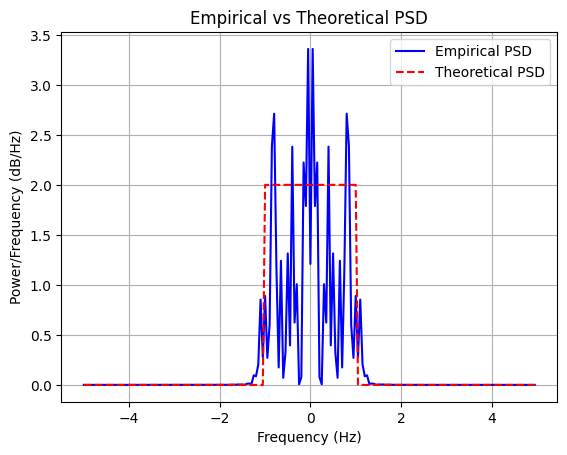

In [1]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.signal.windows import hamming
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Parameters
B = 2  # Bandwidth in Hz
N0 = 1  # Power spectral density level
Fs = 10  # Sampling frequency in Hz
T = 20  # Duration of the signal in seconds
N = int(T * Fs)  # Number of samples

# Time vector
t = np.arange(N) / Fs

# Generate white Gaussian noise
x = np.sqrt(N0 * Fs) * np.random.randn(N)

# Design a low-pass filter to band-limit the noise
f_cutoff = B / 2  # Cutoff frequency
b, a = butter(6, f_cutoff / (Fs / 2))  # 6th order Butterworth filter

# Apply the filter to the noise
x_bandlimited = lfilter(b, a, x)

# Compute the empirical PSD using FFT
X = np.fft.fft(x_bandlimited, n=N)
PSD_empirical = (1 / (Fs * N)) * np.abs(X) ** 2
PSD_empirical = np.fft.fftshift(PSD_empirical)  # Shift zero frequency component to the center
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))  # Frequency vector for both positive and negative frequencies

# Theoretical PSD
PSD_theoretical = 2 * N0 * (np.abs(f) <= B / 2)

# Plotting
plt.figure()
plt.plot(f, PSD_empirical, 'b', linewidth=1.5, label='Empirical PSD')
plt.plot(f, PSD_theoretical, 'r--', linewidth=1.5, label='Theoretical PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Empirical vs Theoretical PSD')
plt.legend()
plt.grid(True)
plt.show()


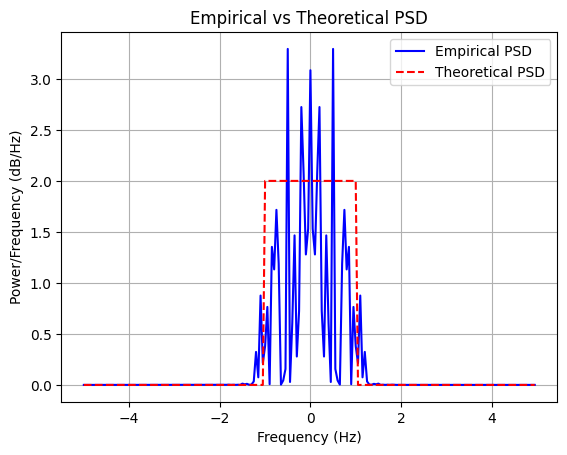

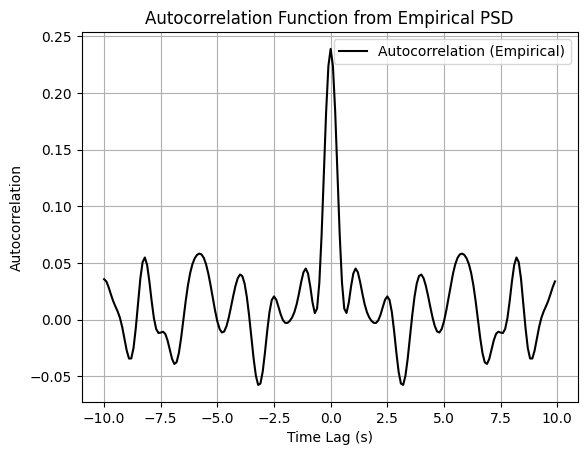

In [2]:
import numpy as np
from scipy.signal import butter, lfilter
from scipy.signal.windows import hamming
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Parameters
B = 2  # Bandwidth in Hz
N0 = 1  # Power spectral density level
Fs = 10  # Sampling frequency in Hz
T = 20  # Duration of the signal in seconds
N = int(T * Fs)  # Number of samples

# Time vector
t = np.arange(N) / Fs

# Generate white Gaussian noise
x = np.sqrt(N0 * Fs) * np.random.randn(N)

# Design a low-pass filter to band-limit the noise
f_cutoff = B / 2  # Cutoff frequency
b, a = butter(6, f_cutoff / (Fs / 2))  # 6th order Butterworth filter

# Apply the filter to the noise
x_bandlimited = lfilter(b, a, x)

# Compute the empirical PSD using FFT
# New method to compute the PSD based on Schonhoff's method, Fig. 2.8
X = np.fft.fft(x_bandlimited, n=N)
PSD_empirical = (1 / (Fs * N)) * np.abs(X) ** 2
PSD_empirical = np.fft.fftshift(PSD_empirical)  # Shift zero frequency component to the center
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))  # Frequency vector for both positive and negative frequencies

# Theoretical PSD
PSD_theoretical = 2 * N0 * (np.abs(f) <= B / 2)

# Inverse Fourier Transform to get the autocorrelation function
autocorr_empirical = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(PSD_empirical)))

# Plotting the Empirical PSD vs Theoretical PSD
plt.figure()
plt.plot(f, PSD_empirical, 'b', linewidth=1.5, label='Empirical PSD')
plt.plot(f, PSD_theoretical, 'r--', linewidth=1.5, label='Theoretical PSD')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Empirical vs Theoretical PSD')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the Autocorrelation Function
plt.figure()
plt.plot(t - T/2, np.real(autocorr_empirical), 'k', linewidth=1.5, label='Autocorrelation (Empirical)')
plt.xlabel('Time Lag (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function from Empirical PSD')
plt.legend()
plt.grid(True)
plt.show()


## Process $\mathbf{v}(t)$

To simulate the process $\mathbf{v}(t) = \mathbf{x}^2(t)$, compute its empirical PSD, and plot the theoretical PSD, we will proceed with the following steps in Python:

1. Generate $\mathbf{x}(t)$ as a band-limited Gaussian noise process.
2. Generate $\mathbf{v}(t)$ as the square of $\mathbf{x}(t)$.
3. Compute the empirical PSD of $\mathbf{v}(t)$.
4. Calculate the theoretical PSD of $\mathbf{v}(t)$ and plot it for comparison.


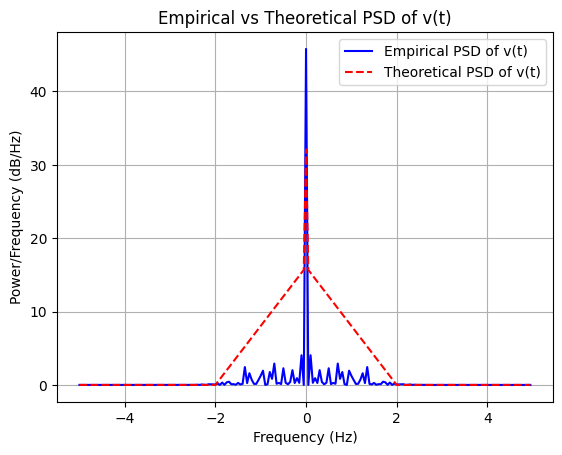

In [3]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Parameters
B = 2  # Bandwidth in Hz
N0 = 1  # Power spectral density level
Fs = 10  # Sampling frequency in Hz
T = 20  # Duration of the signal in seconds
N = int(T * Fs)  # Number of samples

# Time vector
t = np.arange(N) / Fs

# Generate white Gaussian noise
x = np.sqrt(N0 * Fs) * np.random.randn(N)

# Design a low-pass filter to band-limit the noise
f_cutoff = B / 2  # Cutoff frequency
b, a = butter(6, f_cutoff / (Fs / 2))  # 6th order Butterworth filter

# Apply the filter to the noise
x_bandlimited = lfilter(b, a, x)

# Generate v(t) = x^2(t)
v = x_bandlimited**2

# Compute the empirical PSD of v(t) using FFT
V = np.fft.fft(v, n=N)
PSD_empirical_v = (1 / (Fs * N)) * np.abs(V) ** 2
PSD_empirical_v = np.fft.fftshift(PSD_empirical_v)  # Shift zero frequency component to the center
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/Fs))  # Frequency vector for both positive and negative frequencies

# Theoretical PSD of v(t)
# C(f) calculation
def theoretical_psd_x(f):
    return 2 * N0 * (np.abs(f) < B / 2)

def C(f):
    f_range = np.linspace(-Fs/2, Fs/2, N)
    S_x_f = theoretical_psd_x(f_range)
    S_x_f_shifted = theoretical_psd_x(f[:, None] - f_range)
    return np.trapz(S_x_f * S_x_f_shifted, f_range, axis=-1)



S_v_f = (2 * N0 * B) ** 2 * (f == 0) + 2 * C(f)

# Plotting
plt.figure()
plt.plot(f, PSD_empirical_v, 'b', linewidth=1.5, label='Empirical PSD of v(t)')
plt.plot(f, S_v_f, 'r--', linewidth=1.5, label='Theoretical PSD of v(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Empirical vs Theoretical PSD of v(t)')
plt.legend()
plt.grid(True)
plt.show()


#### Schonhoff's Simulation

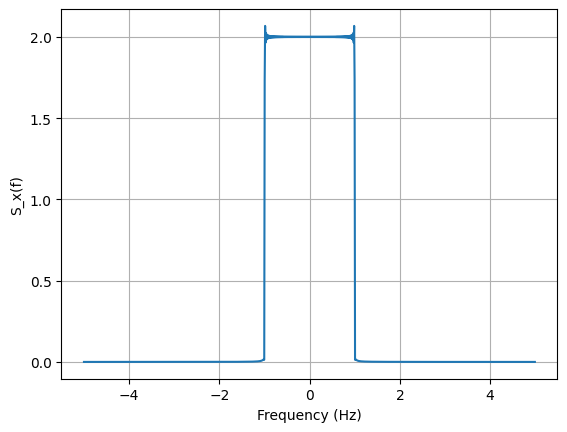

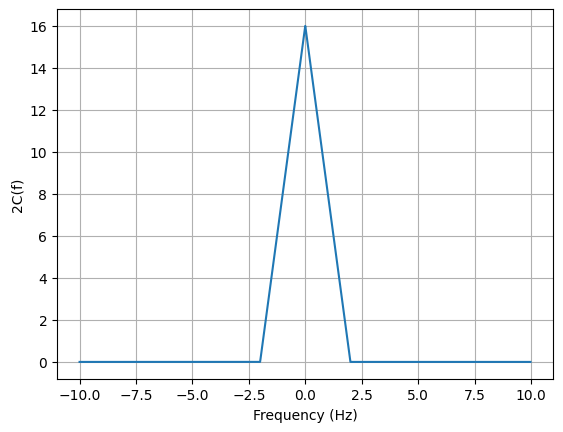

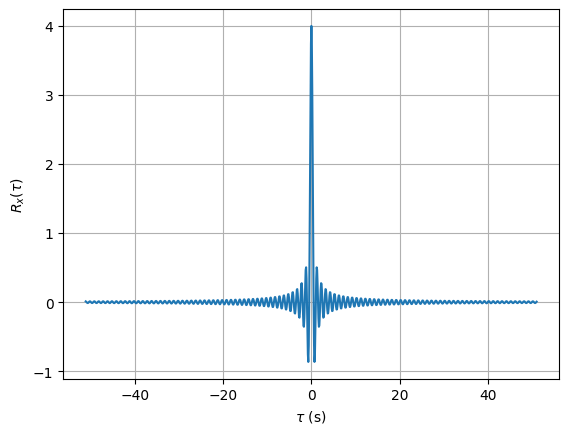

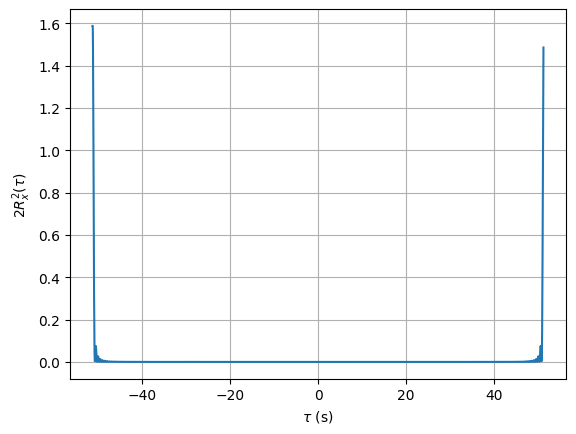

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def cnv(b, n):
    f0 = b / 2  # Center frequency
    ts = 0.1    # Sampling interval
    ts2 = ts / 2
    fi = 1 / ts  # Nyquist frequency
    df = 1 / (n * ts)  # Frequency resolution
    n2 = n // 2
    ni2 = n2 * ts
    
    # Time vector centered around zero
    t = np.arange(-ni2, ni2, ts)
    
    # Autocorrelation function
    r = 4 * np.sinc(2 * t)
    
    # Fourier Transform of the autocorrelation function
    h = ts * np.fft.fftshift(np.fft.fft(r, n))
    mh = np.abs(h)
    
    # Frequency vector for plotting Sx(f)
    f = np.arange(-n2, n2) * df
    
    # Power spectral density Sx(f)
    plt.figure()
    plt.plot(f, mh)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('S_x(f)')
    plt.grid(True)
    plt.show()
    
    # Convolution to obtain 2C(f)
    fc = 2 * np.convolve(h, h) / (n * ts)
    
    # Frequency vector for plotting 2C(f)
    fl = np.arange(-len(fc)//2, len(fc)//2) * df
    
    # Power spectral density 2C(f)
    plt.figure()
    plt.plot(fl, np.abs(fc))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('2C(f)')
    plt.grid(True)
    plt.show()
    
    # Inverse Fourier Transform to obtain autocorrelation of squared process
    g = np.fft.ifftshift(np.fft.ifft(fc))
    
    # Time vector for plotting 2Rx(tau)^2
    tt = np.arange(-n + 1, n) * ts2
    
    # Autocorrelation Rx(tau)
    plt.figure()
    plt.plot(t, r)
    plt.xlabel(r'$\tau$ (s)')
    plt.ylabel(r'$R_x(\tau)$')
    plt.grid(True)
    plt.show()
    
    # Autocorrelation 2Rx(tau)^2 
    plt.figure()
    plt.plot(tt, np.abs(g))
    plt.xlabel(r'$\tau$ (s)')
    plt.ylabel(r'$2R_x^2(\tau)$')
    plt.grid(True)
    plt.show()

    return fc

# Example usage:
b = 100  # Bandwidth in Hz
n = 1024  # Number of samples
fc = cnv(b, n)


# References
* T. Schonhoff and A. Giordano, _Detection and Estimation Theory and its Applications_. Prentice Hall, 2006 , Chapter 2